# 2.1 EDA - Analisis Multivariado

## Import libraries

In [2]:
# Sirve para actualizar el modulo despues de haber cambiado algo en el codigo de los modulos importados
%load_ext autoreload
%autoreload 2

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Modulos propios del proyecto que se encuentran en el directorio src
from src.utils.paths import data_dir
from src.utils.paths import references_dir


## Set up

In [5]:
# Configuracion de opciones

# Configuramos para que muestre siempre todas las columnas disponibles
pd.options.display.max_columns = None

In [6]:
# Definimos el constantes de colores de acuerdo al negocio para usar en los plots
COLOR_VINO_TINTO = "#7C3030"
COLOR_VINO_BLANCO = "#ffffbf"

## Read Data

In [7]:
# Obtenemos la ruta de los csv's que vamos a utilizar
WINE_CSV_PATH = data_dir("processed", "df_wine_enriched_2.csv")

WINE_CSV_PATH

WindowsPath('c:/Users/cvigo/data-projects/proyecto-final-vinos/vinos-corderhouse/data/processed/df_wine_enriched_2.csv')

In [8]:
# Leemos los csv's y los guardamos en un dataframe
df_wine = pd.read_csv(WINE_CSV_PATH)

# Analsis bivariado

### Price vs año de elaboracion

Text(0, 0.5, 'price')

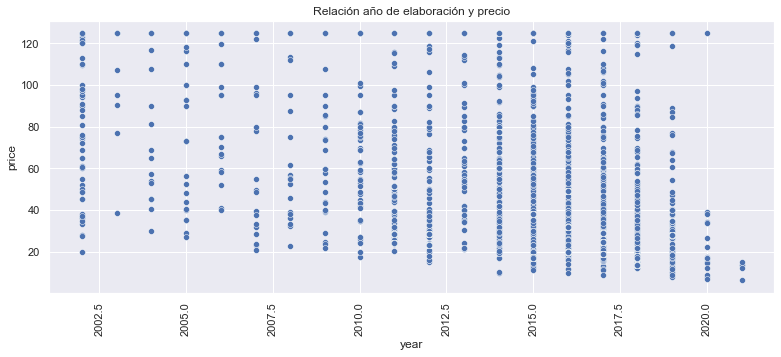

In [37]:
# sns.scatterplot price y year
#plt.figure(figsize=(20,18))
#sns.set_theme(palette="pastel")

sns.set(rc={'figure.figsize':(13,5)})
sns.scatterplot(x="year", y="price", data=df_wine, palette=["#7C3030", "#ffffbf"])
plt.title('Relación año de elaboración y precio')
plt.xlabel('year')
plt.xticks(rotation=90)
plt.ylabel('price')

En el gráfico se puede observar que el precio de los vinos es muy variado y que no existe una relacion directa entre el año y el precio

### Precio vs tipo de vino

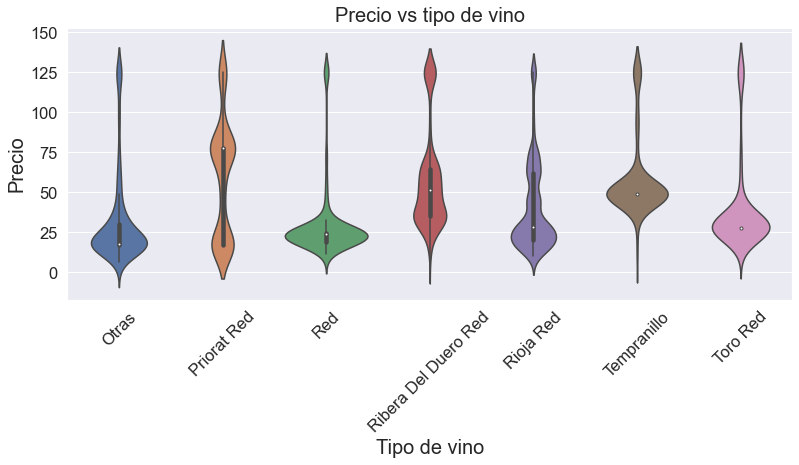

In [49]:
#Violinplot
sns.violinplot(y = 'price', x = 'type', data = df_wine)
plt.title('Precio vs tipo de vino', fontsize=20)
plt.xlabel('Tipo de vino', fontsize=20)
plt.ylabel('Precio', fontsize=20)
plt.xticks(rotation=45)
plt.show()

- Los tipos de vino que tiene mas vavierdad de precios son los de Priorat Red
- La mayor cantidad de vinos se encuentra por debajo de los 75$
- Los vinos que tienen una media de precios mas elevada son los de Priorat Red

### Numero de reviews vs rating

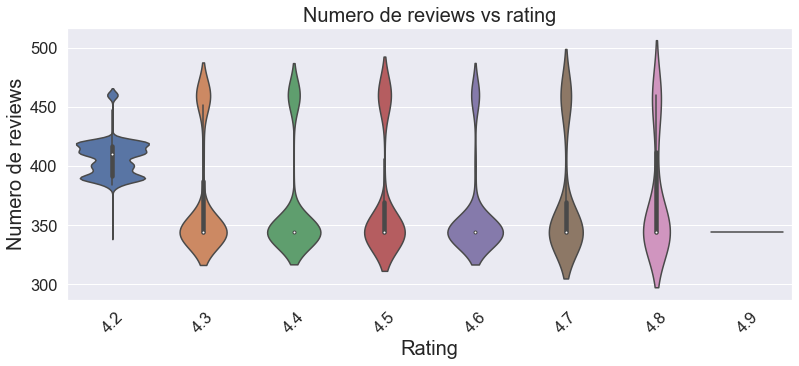

In [50]:
sns.violinplot(y = 'num_reviews', x = 'rating', data = df_wine)
plt.title('Numero de reviews vs rating', fontsize=20)
plt.xlabel('Rating', fontsize=20)
plt.ylabel('Numero de reviews', fontsize=20)
plt.xticks(rotation=45)
plt.show()

- La mayoría de las persondas suele dejar una puntuación de 4.2 puede ser que prefiera opinar sobre un vino que no les gusto tanto que de uno que si. O puede ser que la mayoria de los vinos no sea tan bueno para el publico

### Año de elaboracion vs quality

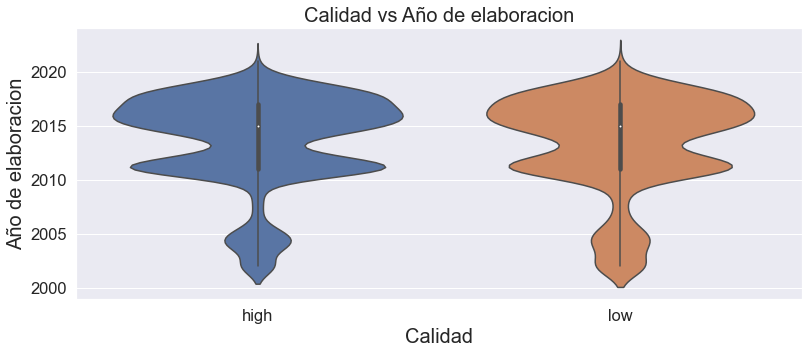

In [56]:
sns.violinplot(y = 'year', x = 'quality', data = df_wine)
plt.title('Calidad vs Año de elaboracion', fontsize=20)
plt.xlabel('Calidad', fontsize=20)
plt.ylabel('Año de elaboracion', fontsize=20)
plt.show()

Ambas distribuciones son practicamente identicas. Para ambas calidades la eleboracion de la mayoria de los vinos se concentra del 2015 al 2020

### Price vs Quality

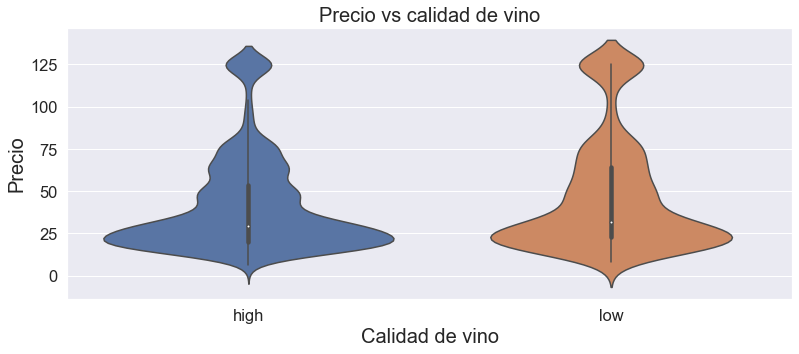

In [57]:
#Violinplot
sns.violinplot(y = 'price', x = 'quality', data = df_wine)
plt.title('Precio vs calidad de vino', fontsize=20)
plt.xlabel('Calidad de vino', fontsize=20)
plt.ylabel('Precio', fontsize=20)
plt.show()

Aca observamos una posible incosistencia de los datos, los vinos de alta calidad tienen una densidad mayor en los precios mas bajos y menor en los altos. Con esto podemos decir que los precios altos no estan relacionalados con la alta calidad del vino.

### Alcohol vs Quality

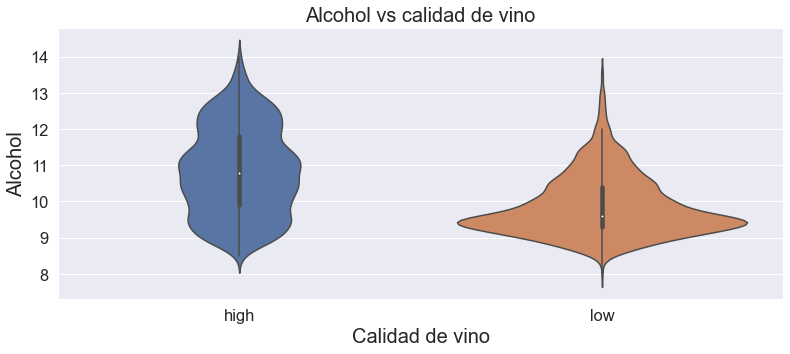

In [58]:
#Violinplot
sns.violinplot(y = 'alcohol', x = 'quality', data = df_wine)
plt.title('Alcohol vs calidad de vino', fontsize=20)
plt.xlabel('Calidad de vino', fontsize=20)
plt.ylabel('Alcohol', fontsize=20)
plt.show()

Acá podemos enconrtrar una posible relacion entre los vinos de alta calidad y la graduacion de alcohol. Los vinos de alta calidad están mas distribuidos en graduación alcoholica, en comparacion a los de baja calidad que se concentran en graduaciones de alcoholica mas bajas.

### Residual sugar vs quality

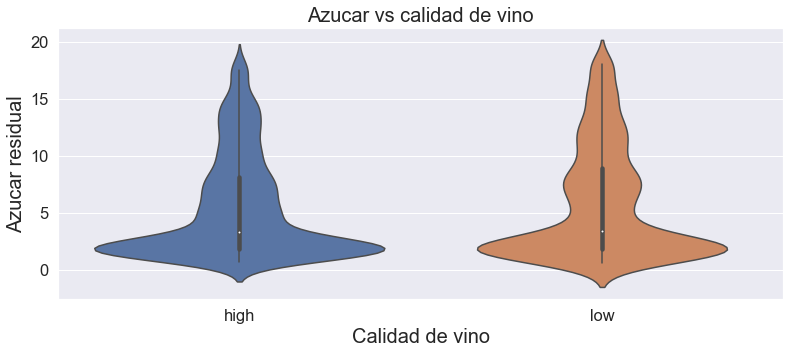

In [59]:
#Violinplot
sns.violinplot(y = 'residual_sugar', x = 'quality', data = df_wine)
plt.title('Azucar vs calidad de vino', fontsize=20)
plt.xlabel('Calidad de vino', fontsize=20)
plt.ylabel('Azucar residual', fontsize=20)
plt.show()

### Ph vs quality

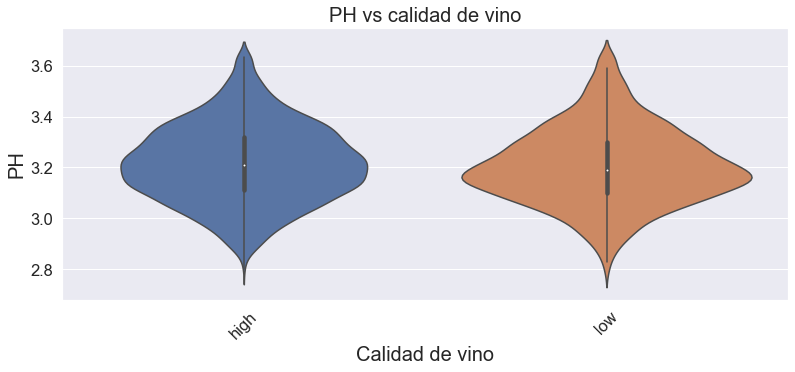

In [61]:
#Violinplot
sns.violinplot(y = 'pH', x = 'quality', data = df_wine)
plt.title('PH vs calidad de vino', fontsize=20)
plt.xlabel('Calidad de vino', fontsize=20)
plt.ylabel('PH', fontsize=20)
plt.xticks(rotation=45)
plt.show()

### Density vs quality

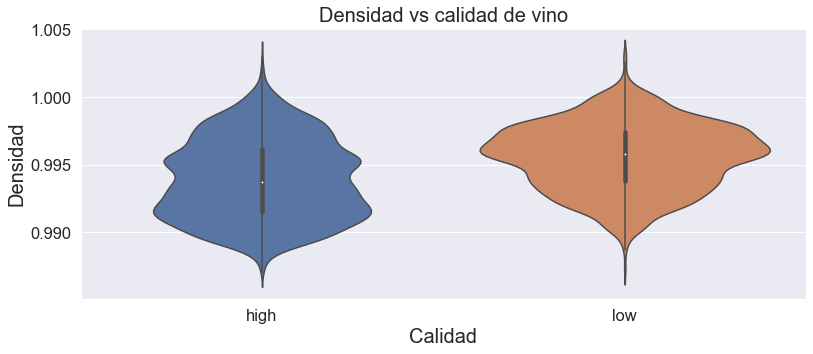

In [63]:
#Violinplot
sns.violinplot(y = 'density', x = 'quality', data = df_wine)
plt.title('Densidad vs calidad de vino', fontsize=20)
plt.xlabel('Calidad', fontsize=20)
plt.ylabel('Densidad', fontsize=20)
plt.show()

- Los vinos de alta calidad tienen una densidad menor a los vinos de alta calidad

## Chlorides vs quality

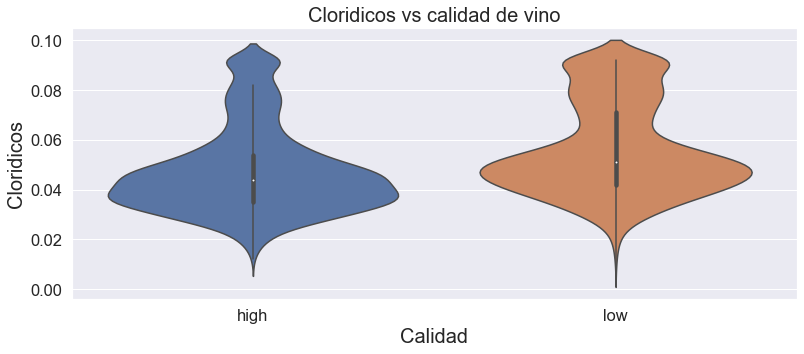

In [66]:
#Violinplot
sns.violinplot(y = 'chlorides', x = 'quality', data = df_wine)
plt.title('Cloridicos vs calidad de vino', fontsize=20)
plt.xlabel('Calidad', fontsize=20)
plt.ylabel('Cloridicos', fontsize=20)
plt.show()

### Acidez vs quality

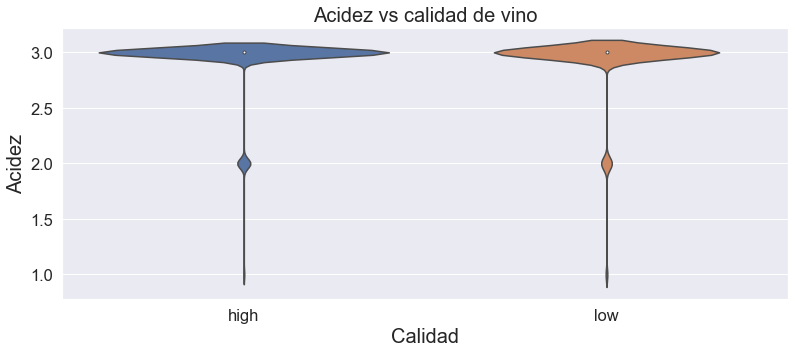

In [67]:
#Violinplot
sns.violinplot(y = 'acidity', x = 'quality', data = df_wine)
plt.title('Acidez vs calidad de vino', fontsize=20)
plt.xlabel('Calidad', fontsize=20)
plt.ylabel('Acidez', fontsize=20)
plt.show()

### Rating vs Quality

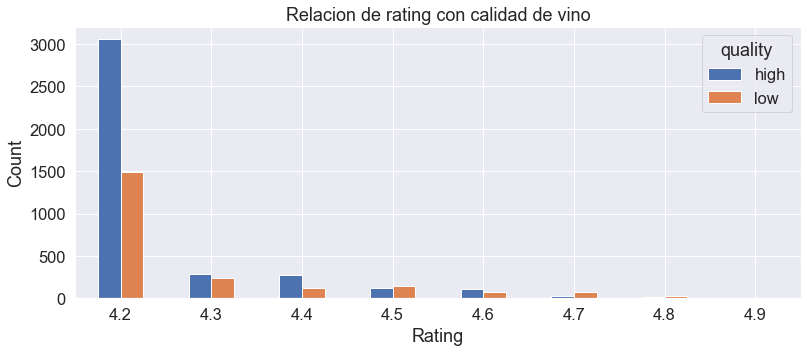

In [100]:
#Crosstable 
crostab = pd.crosstab(df_wine.rating, df_wine.quality).sort_values(by='high', ascending=False)
barplot = crostab.plot.bar(rot=0)
plt.title('Relacion de rating con calidad de vino')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


### Body vs Quality

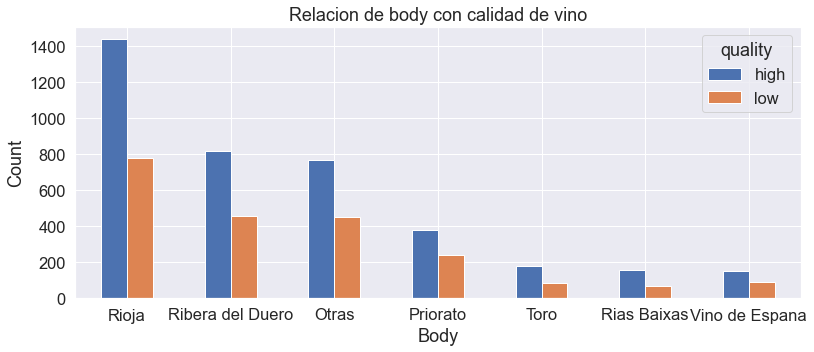

In [97]:
#Crosstable 
crostab = pd.crosstab(df_wine.region, df_wine.quality).sort_values(by='high', ascending=False)
# Creating barplot
barplot = crostab.plot.bar(rot=0)
plt.title('Relacion de body con calidad de vino')
plt.xlabel('Body')
plt.ylabel('Count')
plt.show()

Se puede ver que una calidad de vino mas alta está relacionado con los bodies 4 y 5 

### Region vs Quality

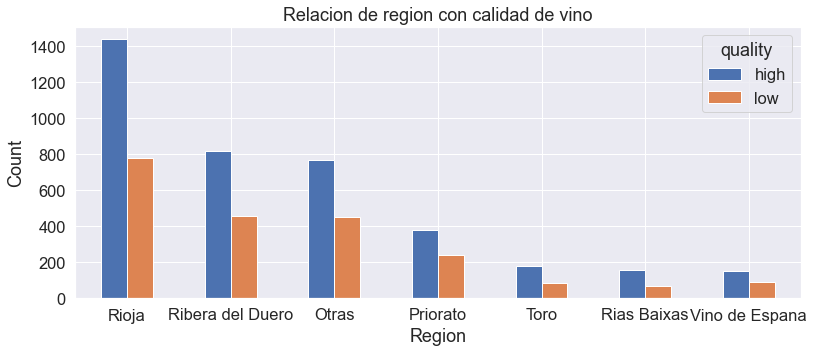

In [98]:
#Crosstable 
crostab = pd.crosstab(df_wine.region, df_wine.quality).sort_values(by='high', ascending=False)
# Creating barplot
barplot = crostab.plot.bar(rot=0)
plt.title('Relacion de region con calidad de vino')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

Los vinos de más alta calidad provienen de la región de Rioja y Ribera del Duero

### type vs quality

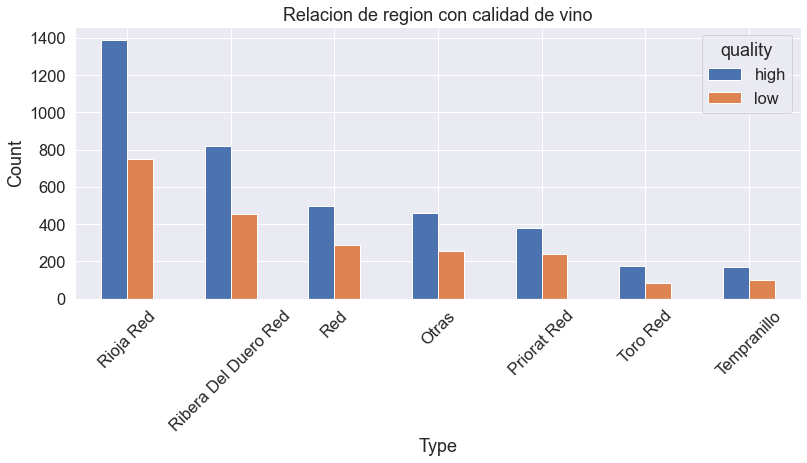

In [102]:
#Crosstable 
crostab = pd.crosstab(df_wine.type, df_wine.quality).sort_values(by='high', ascending=False)
# Creating barplot
barplot = crostab.plot.bar(rot=0)
plt.title('Relacion de region con calidad de vino')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Analisis Multivariado

## Correlaciones

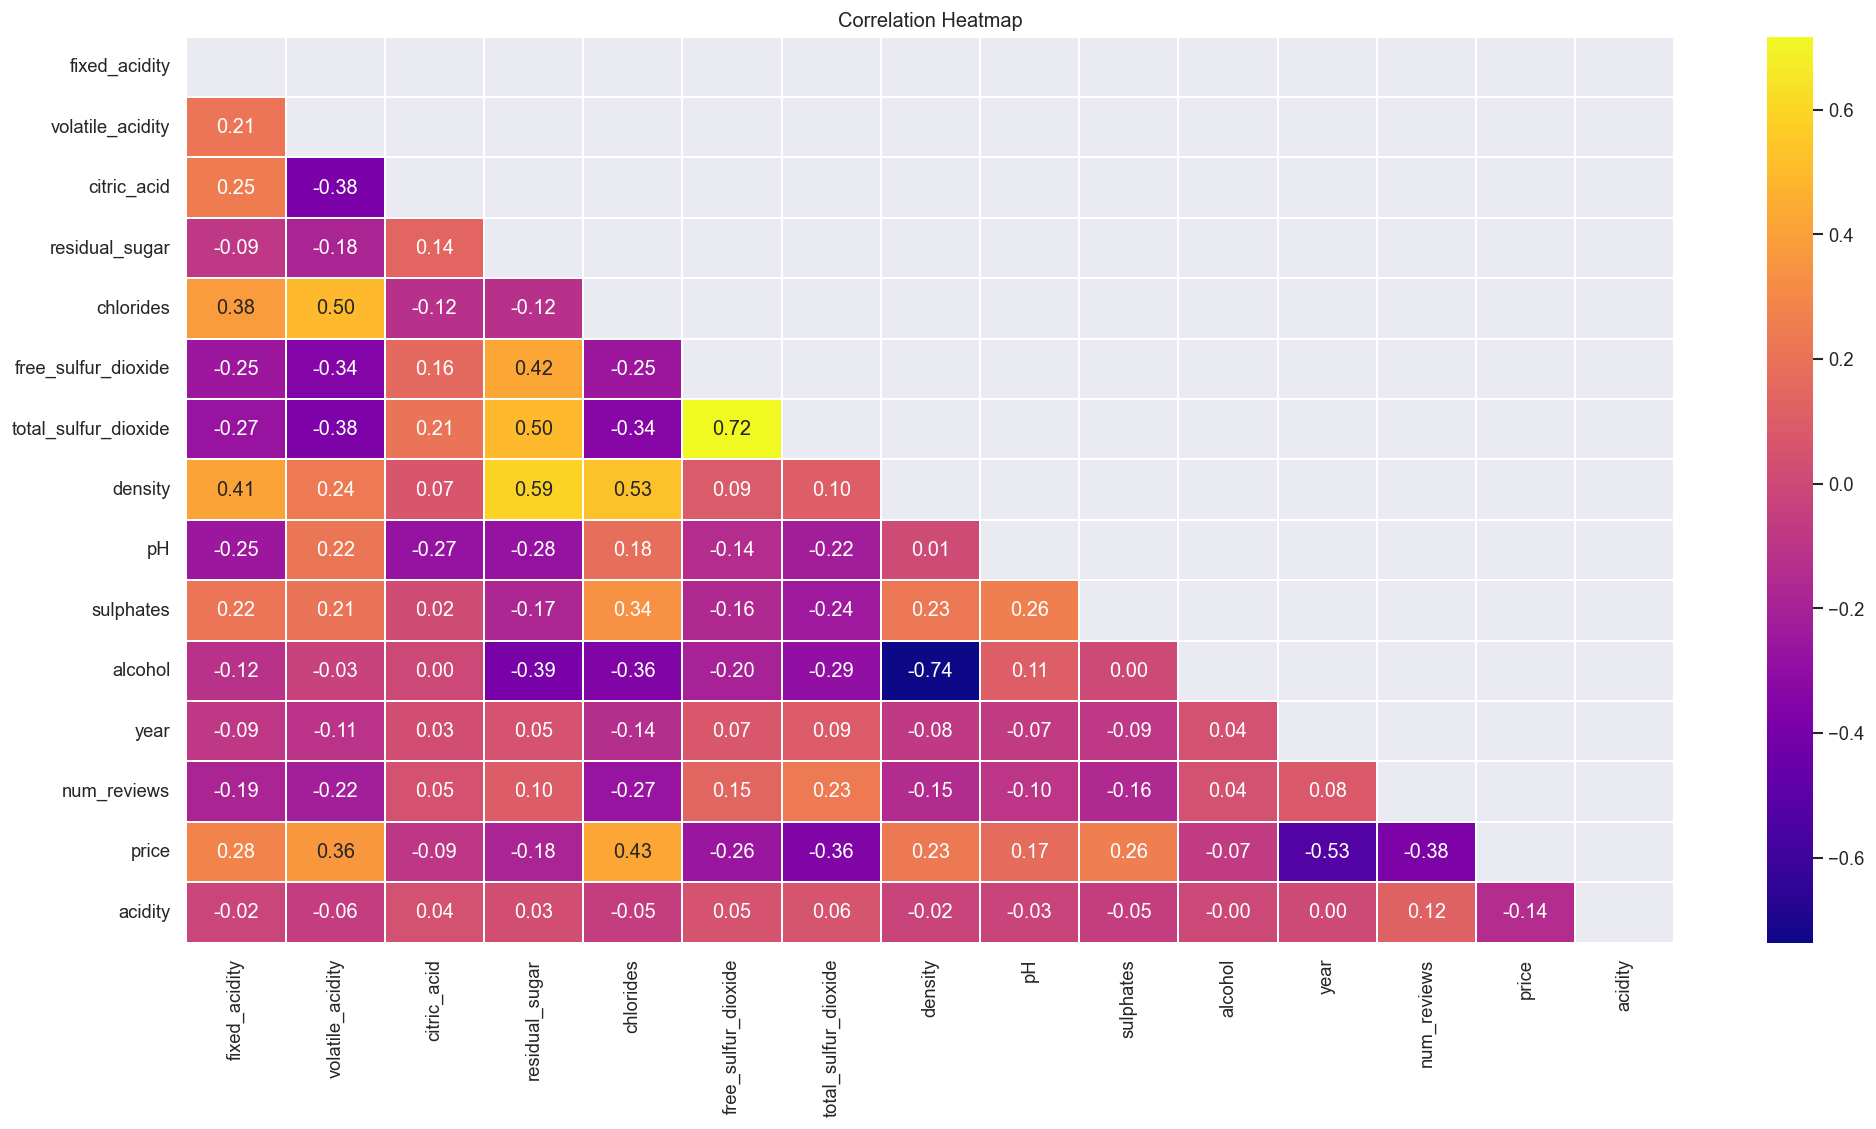

In [103]:
#Correlaciones
plt.figure(dpi = 120,figsize= (20,10))
sns.set(rc={'figure.figsize':(20,10)})
mask = np.triu(np.ones_like(df_wine.corr(),dtype = bool))
sns.heatmap(df_wine.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()
